In [9]:
# imports
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
# Generate 100 sine functions with different a,b,c parameters and random noise
def sine(a,b,c,x):
    return a * np.sin(b * x + c)

n_sins = 100

x_data = np.arange(0,10,0.001)
a_list = np.linspace(0,10,n_sins)
b_list = np.linspace(0.1,6,n_sins)
c_list = np.linspace(0,5,n_sins)

y_data = [0] * n_sins
dict = {}
for i in range(0,len(a_list)):
    random.shuffle(b_list)
    random.shuffle(c_list)
    if i <= 60:
        y_data[i] = sine(a_list[i], b_list[i], c_list[i], x_data) + np.random.normal(-a_list[i],a_list[i],len(x_data))
        y_data[i] = np.append(y_data[i], 1)   #boolean: 1 = there is a sine signal, -1 = just noise
        #plt.plot(x_data, y_data[i])
    else:       
        y_data[i] = np.random.normal(-a_list[i],a_list[i],len(x_data))  # 40 noise datasets with no signal
        y_data[i] = np.append(y_data[i], -1)
        #plt.plot(x_data, y_data[i])

y_data = np.array(y_data).transpose()

In [74]:
print(test_sel.astype(int))

[0 0 0 ... 0 0 0]


In [76]:
length = len(x_data)
test_frac = 0.1
test_sel = np.random.choice([True, False], size=length, p=[test_frac, 1-test_frac])
random.shuffle(test_sel)

y_test = y_data[test_sel.astype(int)]
y_train = y_data[~test_sel]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10001 but corresponding boolean dimension is 10000

In [60]:
print(len(y_data[i]))

100


In [50]:
# Perceptron
def train_perceptron(y_data):
    # Initialize weight vector and bias
    numvars = len(y_train[0])
    w = np.array([0.0] * numvars)
    b = 0.0
    a = 0.0

    for epoch in range(0, epochs):         #run MAX_ITER iterations

        converged = True
        random.shuffle(y_data)                #shuffle between each iteration
        
        for row in y_data:                    #look at each row of the data (each test sine)
            y = np.array(row[:-1])            #y is all the data in the row, excluding the classification column
            y = y.flatten()
            class_y = row[-1]                     

            a = np.dot(w,y) + b             #activation

            if class_y*a <= 0:                     #if the activation is not accurate...
                w += class_y*y                   #update weights
                b += class_y                      #update bias
                converged = False           #If we have to update w and b, then we haven't converged

        if converged:                        #between each iteration, check for convergence
            print("Converged after "+str(i+1)+" iterations.")
            break

    return (w, b)

In [51]:
epochs = 100

# Training
(w, b) = train_perceptron(y_train)

ValueError: shapes (100,) and (99,) not aligned: 100 (dim 0) != 99 (dim 0)

In [43]:
def predict_perceptron(model, y):
    (w, b) = model
    activation = np.dot(w,y) + b
    return activation

# Testing
correct = 0
activations = np.array([0.0] * Y_train.shape[0])

for i in range(0,Y_test.shape[0]):
    activation = predict_perceptron((w, b), Y_test[i])
    activations[i] = activation
    class_y = class_test[i]
    if activation * class_y > 0:
        correct += 1
    print('Actual class: ',class_test[i],', Activation: ',activation)
acc = float(correct) / Y_test.shape[0]
print("Accuracy: ", acc)

Converged after 88 iterations.
Actual class:  1 , Activation:  11131.359692851049
Actual class:  -1 , Activation:  88162.03952735613
Actual class:  -1 , Activation:  122069.95704242053
Actual class:  1 , Activation:  9237.286945686528
Actual class:  -1 , Activation:  208529.9990063904
Actual class:  -1 , Activation:  137846.4736484415
Actual class:  1 , Activation:  -2309.168727580185
Actual class:  1 , Activation:  30152.992721997733
Actual class:  1 , Activation:  70.0
Actual class:  1 , Activation:  98209.63357243345
Actual class:  -1 , Activation:  79714.17847817557
Actual class:  1 , Activation:  8791.447593053996
Accuracy:  0.5


IndexError: index 88 is out of bounds for axis 0 with size 88

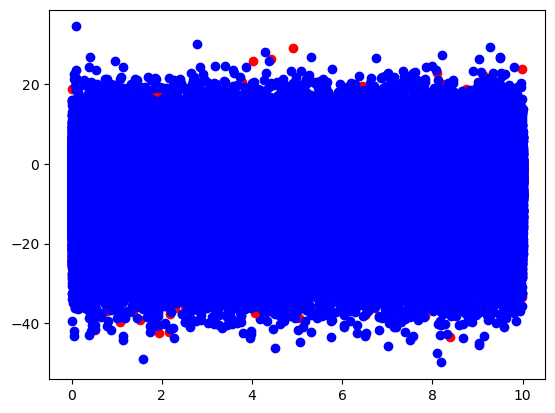

In [41]:
for i in range(0, len(Y_train[0])):
    if activations[i] > 0:
        plt.scatter(x_data, Y_train[i], c='red')
    if activations[i] <= 0:
        plt.scatter(x_data, Y_train[i], c='blue')